Lab 3. Application of the support vector machine for the classification of linearly separable sets. HAB-191 Matychenko A.D.

1. Task 1. Use the make_blobs function to generate a set of points for classification into two classes so that the classes of the examples overlap, but not too much. The random_state variable should be equated to the option number multiplied by 10. Display the objects of each class in the form of points of a certain shape and color on the coordinate plane. Use the scatter method.

<function matplotlib.pyplot.legend(*args, **kwargs)>

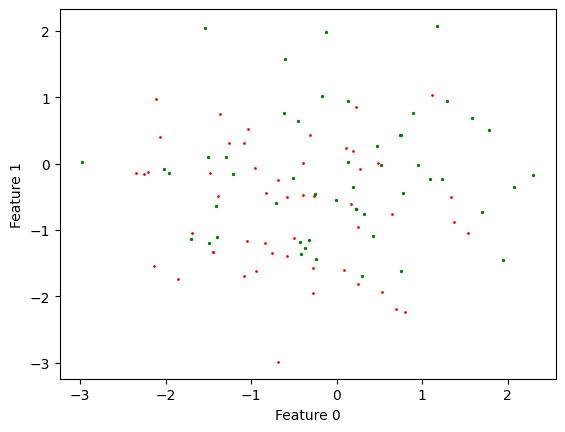

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

centers=[[-0.5,-0.5],[0,0]]
X, Y = make_blobs(centers=centers,random_state=100)


for i in range(len(Y)):
    if Y[i]==0:
        plt.scatter(X[i,0],X[i,1],Y[i]+1,color='r')
        r=i
    if Y[i]==1:
        plt.scatter(X[i,0],X[i,1],Y[i]+1, color='g')
        g=i

plt.scatter(X[r,0],X[r,1],Y[r]+1,label='Class 1', color='r')
plt.scatter(X[g,0],X[g,1],Y[g]+1,label='Class 2', color='g')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend



Task 2. Divide the sample into training and test. Perform machine classification of support vectors on the same data.

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.5,random_state=100)

from sklearn.svm import LinearSVC

model = LinearSVC().fit(X_train,y_train)
y_pred=model.predict(X_test)

Task 3. Using the score function, evaluate the quality of the classification. Justify the obtained results.

18
Quality of classification on the training sample:0.660000
Classification quality on the test sample: 0.640000
Matrix of inaccuracies on the testing sample [[0.5862069  0.4137931 ]
 [0.28571429 0.71428571]]


c:\Users\zuver\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


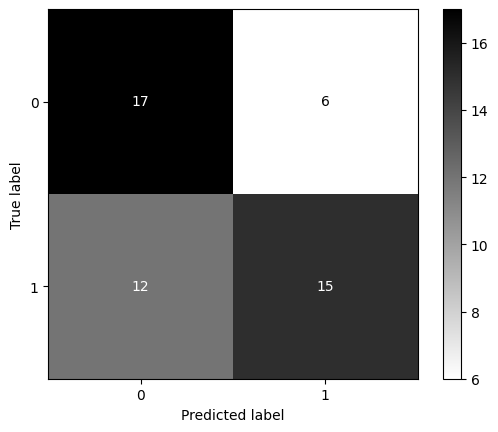

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print((y_test!=y_pred).sum())
print('Quality of classification on the training sample:{:2f}'.format(model.score(X_train,y_train)))
print('Classification quality on the test sample: {:2f}'.format(model.score(X_test,y_test)))
print('Matrix of inaccuracies on the testing sample',confusion_matrix(y_pred,y_test,normalize='true'))
plot_confusion_matrix(model, X_test, y_test, cmap='gray_r')

Result 1 - The model identified 6 points of the first class as the second and 12 points of the second class as the first

Task 4. Plot the dependence of the number of incorrectly classified examples and the quality of classification on the size of the test sample. The test sample size will vary from 0.05 to 0.95 in steps of 0.05. Justify the obtained results.

Text(0, 0.5, 'Count of errors')

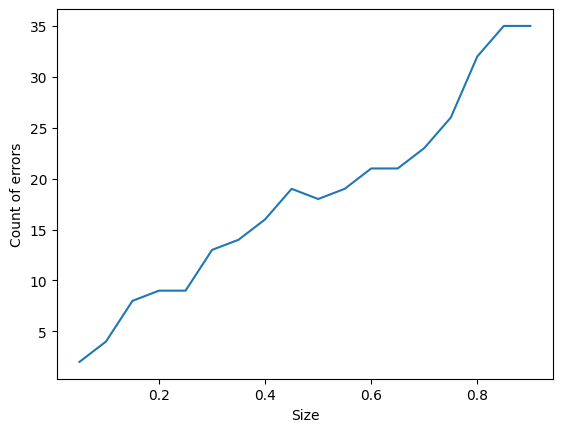

In [15]:
i=0.05
x=[]
y=[]
while i<=0.95:
    X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=i,random_state=100)
    model = LinearSVC().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    temp=(y_test!=y_pred).sum()
    x.append(i)
    y.append(temp)
    i=i+0.05

plt.plot(x,y)
plt.xlabel('Size')
plt.ylabel('Count of errors')

    

Our classifier didn't turn out to be accurate, so either overtraining or undertraining occurred

5. Use the make_blobs function to generate a set of points for multiclass classification so that the classes of the examples overlap, but not too much. The random_state variable should be equated to the option number multiplied by 10. The number of classes is 3 for odd options, 4 for even options. Display objects of each class in the form of points of a certain shape and color on the coordinate plane. Use the scatter method.

<function matplotlib.pyplot.legend(*args, **kwargs)>

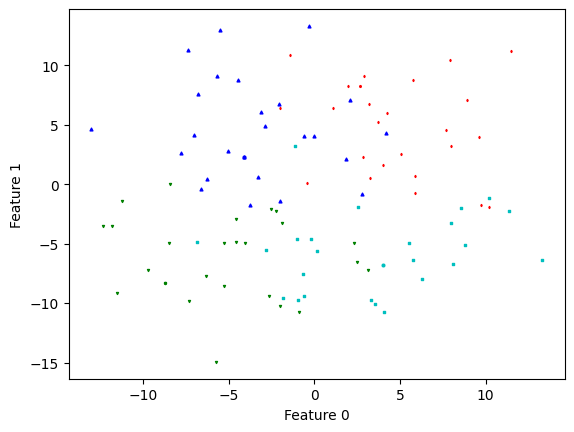

In [16]:
centers=[[5,5],[-5,-5],[5,-5],[-5,5]]
X,Y=make_blobs(centers=centers,cluster_std=4,random_state=100)
for i in range(len(Y)):
    if Y[i]==0:
        plt.scatter(X[i,0],X[i,1],Y[i]+1,color='r',marker='d')
        r=i
    if Y[i]==1:
        plt.scatter(X[i,0],X[i,1],Y[i]+1, color='g',marker='v')
        g=i
    if Y[i]==2:
        plt.scatter(X[i,0],X[i,1],Y[i]+1, color='c',marker='s')
        c=i
    if Y[i]==3:
        plt.scatter(X[i,0],X[i,1],Y[i]+1, color='b',marker='^')
        b=i

plt.scatter(X[r,0],X[r,1],Y[r]+1,label='Class 1', color='r')
plt.scatter(X[g,0],X[g,1],Y[g]+1,label='Class 2', color='g')
plt.scatter(X[c,0],X[c,1],Y[c]+1,label='Class 3', color='c')
plt.scatter(X[b,0],X[b,1],Y[b]+1,label='Class 4', color='b')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend

Task 6. Divide the sample into educational and test. Perform machine classification of support vectors on the same data.

20
Quality of classification on the training sample:0.860000
Classification quality on the test sample: 0.600000
Matrix of inaccuracies on the training sample [[0.0625     0.3125     0.25       0.375     ]
 [0.18181818 0.45454545 0.27272727 0.09090909]
 [0.3        0.3        0.1        0.3       ]
 [0.23076923 0.23076923 0.30769231 0.23076923]]


c:\Users\zuver\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zuver\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


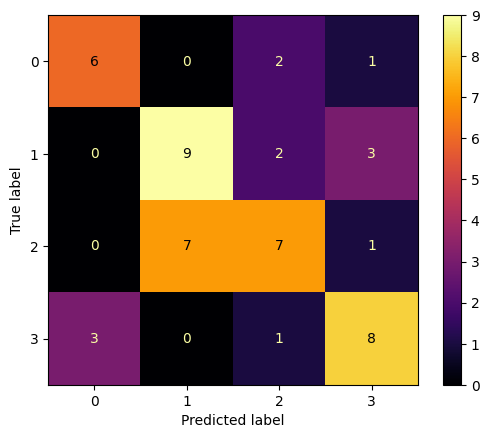

In [17]:

from sklearn.preprocessing import normalize

X_train, X_test, y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=100)
linear_svm=LinearSVC().fit(X_train,y_train)
y_pred_ls=linear_svm.predict(X_test)

print((y_test!=y_pred_ls).sum())
print('Quality of classification on the training sample:{:2f}'.format(linear_svm.score(X_train,y_train)))
print('Classification quality on the test sample: {:2f}'.format(linear_svm.score(X_test,y_test)))

print("Matrix of inaccuracies on the training sample",confusion_matrix(y_train,y_pred_ls, normalize='true'))
plot_confusion_matrix(linear_svm, X_test, y_test, cmap='inferno')


Confusion matrices represent counts from predicted and actual values. The output “TN” stands for True Negative which shows the number of negative examples classified accurately. Similarly, “TP” stands for True Positive which indicates the number of positive examples classified accurately. The term “FP” shows False Positive value, i.e., the number of actual negative examples classified as positive; and “FN” means a False Negative value which is the number of actual positive examples classified as negative. One of the most commonly used metrics while performing classification is accuracy. Accuracy can be misleading if used with imbalanced datasets, and therefore there are other metrics based on confusion matrix which can be useful for evaluating performance. In the first matrix there are no errors, in the second there are errors.

$$
\begin{array}{l|l:c:r:r}
& 0 & 1 & 2 & 3\\
\hline
 0 & True & No\,mistakes & 2\,examples\,of\,0\,class\,classified\,as\,2 & 1\,example\,of\,0\,class\,classified\,as\,3 \\ 
 1 & No\,mistakes & True & 2\,examples\,of\,1\,class\,classified\,as\,2 & 3\,examples\,of\,1\,class\,classified\,as\,3 \\
 2 & No\,mistakes & 7\,examples\,of\,2\,class\,classified\,as\,1 & True & 1\,example\,of\,2\,class\,classified\,as\,3 \\  
 3 & Three\,examples\,of\,third\,class\,classified\,as\,0 & No\,mistakes & 1\,example\,of\,3\,class\,classified\,as\,2  & True \\ \hline
\end{array}
$$ 